In [5]:
from fastbook import *
import timm

path = untar_data(URLs.MNIST_SAMPLE)

path.ls()

(#3) [Path('/Users/fabiano/.fastai/data/mnist_sample/valid'),Path('/Users/fabiano/.fastai/data/mnist_sample/labels.csv'),Path('/Users/fabiano/.fastai/data/mnist_sample/train')]

In [11]:
timm.list_models("levit*")[:10]

['levit_128',
 'levit_128s',
 'levit_192',
 'levit_256',
 'levit_256d',
 'levit_384',
 'levit_384_s8',
 'levit_512',
 'levit_512_s8',
 'levit_512d']

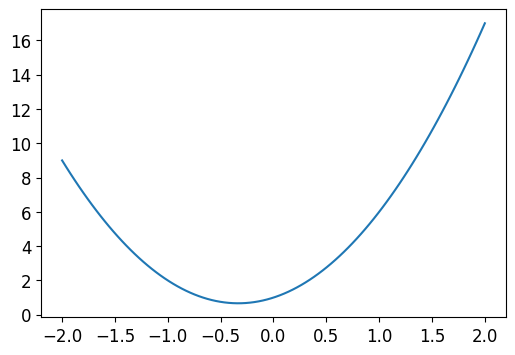

In [14]:
def quad(a, b, c, x): return a * x**2 + b * x + c
def mk_quad(a, b, c): return lambda x: quad(a, b, c, x)

f = mk_quad(3, 2, 1)

plot_function(f)

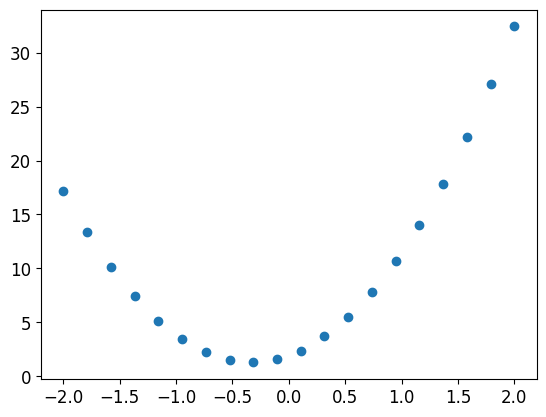

In [18]:
from numpy.random import normal,seed,uniform

np.random.seed(22)

def add_noise(x): return x * normal(2, scale=1)

x = torch.linspace(-2, 2, steps=20)[:, None]
y = add_noise(f(x))

plt.scatter(x, y)
